# 18-4-2-DRILL-Interpreting-coefficients-Weather

## Interpreting-coefficients-Weather

To close out this checkpoint, you're going to do three assignments. For the first assignment, you'll write up a short answer to a question. For the second two assignments, you'll do your work in Jupyter notebooks.

Please submit links to all your work below. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to these example solutions. https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb

2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the weatherinszeged table from Thinkful's database.

* Build a linear regression model 
    - where your target variable is the difference between the apparenttemperature and the 
    temperature. ---> y=apparenttemperature - temperature
    - As explanatory variables, use humidity and windspeed. ---> X = humidity, windspeed
    - Now, estimate your model using OLS. Are the estimated coefficients statistically
    significant? 
    - Are the signs of the estimated coefficients in line with your previous
    expectations? 
    - Interpret the estimated coefficients. What are the relations between the target and the
    explanatory variables?

* Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. 

* Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [16]:
#postgres_user = 'dsbc_student'
#postgres_pw = '7*.8G9QH21'
#postgres_host = '142.93.121.174'
#postgres_port = '5432'
#postgres_db = 'weatherinszeged'

### Load the data 

In [3]:
#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    #postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
#engine.dispose()

weather = pd.read_csv('weatherHistory.csv')

weather.head(10)

#weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
weather.rename(columns={'Apparent Temperature (C)': 'apparenttemperature','Humidity': 'humidity', 'Wind Speed (km/h)': 'windspeed', 'Wind Bearing (degrees)': 'windbearing', 'Pressure (millibars)': 'pressure', 'Temperature (C)': 'temperature'}, inplace=True)

In [ ]:
## Plot the scatter matrix for all variables in the dataset. 
##Do all variables have a pairwise linear relationship?

#pd.plotting.scatter_matrix(weather, figsize=(12, 12))
#plt.tight_layout()
#plt.show()

In [17]:
# Next check the data to make sure there is no missing data. 
# Remove rows containing missing data if it exists. 

weather.isnull().sum()*100/weather.isnull().count()

Formatted Date        0.000
Summary               0.000
Precip Type           0.536
temperature           0.000
apparenttemperature   0.000
humidity              0.000
windspeed             0.000
windbearing           0.000
Visibility (km)       0.000
Loud Cover            0.000
pressure              0.000
Daily Summary         0.000
dtype: float64

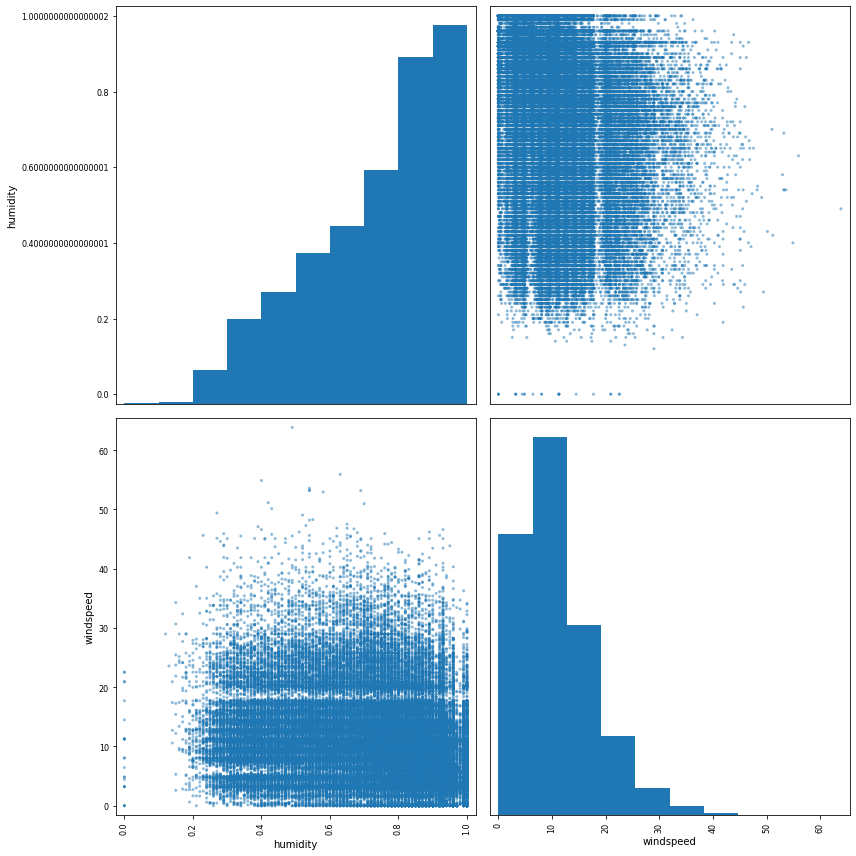

In [19]:
# extracting just the variables needed

#X = weather[['humidity','windspeed','windbearing', 'pressure']] 

#As explanatory variables, use humidity and windspeed.[ X = humidity, windspeed]
X = weather[['humidity','windspeed']] 


# Y is the target variable
# where your target variable is the difference between the apparenttemperature and the 
# temperature. [y=apparenttemperature - temperature]
Y = weather['apparenttemperature'].values - weather['temperature'].values

pd.plotting.scatter_matrix(X, figsize=(12, 12))
plt.tight_layout()
plt.show()


** None of these looks linear at all ???? 

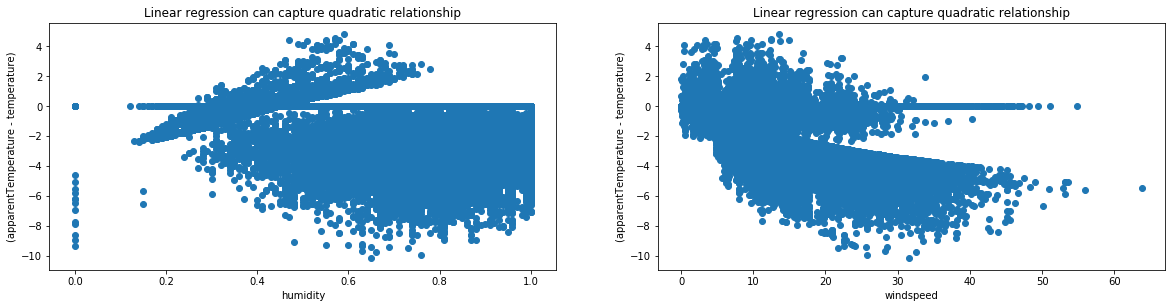

In [11]:
### humidity, windspeed, windbearing, and pressure are the explainatory variables. 
# since they are all float lets see how the plots look like relative to temperature

#features = weather[['humidity','windspeed']
plt.figure (figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(X['humidity'], [weather['apparenttemperature'] - weather["temperature"]])
plt.xlabel("humidity")
plt.ylabel("(apparentTemperature - temperature)")
plt.title('Linear regression can capture quadratic relationship')


plt.subplot(2,2,2)
plt.scatter(X['windspeed'], [weather['apparenttemperature'] - weather["temperature"]])
plt.xlabel("windspeed")
plt.ylabel("(apparentTemperature - temperature)")
plt.title('Linear regression can capture quadratic relationship')


plt.show()

These don't look like linear relationship to me at all 

### Now, let's build our  model using these 4 features: Humidity, windspeed, windbearing, pressure
- we build a simple linear regression model and estimate it using OLS

*** from sklearn import linear_model
*** lrm = linear_model.LinearRegression()

- pip install statsmodels if you need it

In [13]:
#### We could use LinearRegression() model from the linear_model module - 
# then we will use the easy way which would be OLS


# We create a LinearRegression model object
# from scikit-learn's linear_model module.

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
### LinearRegression()'s fit() method runs the OLS algorithm by default
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.02918594 -0.11929075]

Intercept: 
 2.4381054151877035


In [20]:
### Now, estimate your model using OLS. Are the estimated coefficients statistically 
#significant?
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        16:47:33   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis of the statsmodel function
* NOTE: we added a constant to our existing feature set using this code:X = sm.add_constant(X). This is because statsmodels' fit() function doesn't add a constant by default as opposed to scikit-learn's fit() function.

* when we call the summary() function on the fitted OLS model, it prints out a table statistics.

* in the upper side of the table, we see statistics like R-squared, adjusted R-squared, F-statistic, Log-likelihood, AIC, and BIC. Those are related to the goodness of fit of our model. 

* In the lower part, we see statistics like Durbin-Watson, Jarque-Bera, skewness, and kurtosis. Those statistics are related to whether our model satisfies some assumptions of the linear regression model. 

* For example, skewness is a measure of how asymmetric our data is and kurtosis is a measure of whether our data is heavy or light tailed with respect to a normal distribution. 

* notice that in the middle of the table, estimated values for the coefficients are given, and those are exactly the same as what we got from the scikit-learn.

#### Are the estimated coefficients statistically significant?
Our p-value is 0 which is < 0.05. That means we reject the null and this means that the coefficients - humidity and windspeed is significant

#### Are the signs of the estimated coefficients in line with your previous expectations?
## ????? DOn't know this one

#### Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?

- Bias = 2.4381
- Humidity = -3.0292
- windspeed =	-0.1193	

(diff between apparent temp and temp) = 2.4381-3.0292(humidity)-0.1193(windspeed) 

- with a one point increase in humidity, results in 3.03 decrease in Y (apptemp-temp). one point increase in windspped results in 0.12 point decrease in Y

- We can expect that as humidity increases the difference between the apparent temperature and the temperature also increases. However, according to our estimations the sign of the coefficient of the humidity is negative. We may also expect that the difference of the apparent tempereture and the temperature negatively related with the wind speed as our estimation says so.


### Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS.

In [21]:
#### Next, include the interaction of humidity and windspeed to the model above and 
# estimate the model using OLS.
weather['humidity_windspeed_interaction'] = weather.humidity * weather.windspeed

# Y is the target variable
Y = weather['apparenttemperature'] - weather['temperature']
# X is the feature set
X = weather[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Mon, 06 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:03:35   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

- P-values for all three coefficients are < 0.05 meaning we reject the null. Therefore, all of these coefficients are significant.

(diff between apparent temp and temp) = 0.0839 + 0.1775(humidity) + 0.0905(windspeed)-0.2971 (humidity_windspeed_interaction)  

- Signs of the both humidity and windspeed changed from negative to the positive when we include the intereaction term.

- According to the model, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.

- According to the model, the coefficient of the interaction term is -0.30. (humidity_windspeed_interaction	-0.2971) 
    * We can interpret it as follows. Given a windspeed level, 1 point increase in humidity 
    results in 0.18 - 0.30 X windspeed point increase in the target. 
    * This means that the increase in the target is lower for high values of windspeed than   
    for low values of windspeed. 
    * So, the windspeed mitigates the effect of humidity increase on the target. 
    
    * Similarly for a given humidity level, 1 point increase in the windspeed results in 
    0.09 - 0.30 X humidity point increase in the target. 
    * So, the humidity also mitigates the effect of windspeed on the target.
	